<a href="https://colab.research.google.com/github/AmitS1009/ML_Projects/blob/main/Pokemon_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
!wget https://www.dropbox.com/scl/fo/oi9huerppteppcz5t5b32/AJ_ykZC9n5AA0BJat_LlnYI?rlkey=uas4cay1272poo2jc6gf0n5rp&e=1 -O data

/bin/bash: line 1: -O: command not found
--2024-10-25 05:17:13--  https://www.dropbox.com/scl/fo/oi9huerppteppcz5t5b32/AJ_ykZC9n5AA0BJat_LlnYI?rlkey=uas4cay1272poo2jc6gf0n5rp
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5aa43af529441d86539911f58d.dl.dropboxusercontent.com/zip_download_get/CAd8HqYAGC2_mFEC_pmI7tLNDMAFb5SjwO-DIEVfKNMypzbwnRiEdFlNVwNL2yDCX0cWpjnKMNyKbxo9upU_qlvps27H9Cw-d9oe54zYnCGjBQ# [following]
--2024-10-25 05:17:14--  https://uc5aa43af529441d86539911f58d.dl.dropboxusercontent.com/zip_download_get/CAd8HqYAGC2_mFEC_pmI7tLNDMAFb5SjwO-DIEVfKNMypzbwnRiEdFlNVwNL2yDCX0cWpjnKMNyKbxo9upU_qlvps27H9Cw-d9oe54zYnCGjBQ
Resolving uc5aa43af529441d86539911f58d.dl.dropboxusercontent.com (uc5aa43af529441d86539911f58d.dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:601d:15::a27d:50f
Connecting 

In [3]:
!unzip data -d "images/"

Archive:  data
mapname:  conversion of  failed
   creating: images/Test/
   creating: images/Train/
   creating: images/Test/Pikachu/
   creating: images/Train/Pikachu/
   creating: images/Test/Bulbasaur/
   creating: images/Train/Bulbasaur/
   creating: images/Test/Charmander/
   creating: images/Train/Charmander/
 extracting: images/Train/Pikachu/345.jpg  
 extracting: images/Train/Pikachu/335.jpg  
 extracting: images/Train/Pikachu/299.jpg  
 extracting: images/Train/Pikachu/396.jpg  
 extracting: images/Train/Pikachu/350.jpg  
 extracting: images/Train/Pikachu/308.jpg  
 extracting: images/Train/Pikachu/346.jpg  
 extracting: images/Train/Pikachu/355.jpg  
 extracting: images/Train/Pikachu/353.jpg  
 extracting: images/Train/Pikachu/390.jpg  
 extracting: images/Train/Pikachu/319.jpg  
 extracting: images/Train/Pikachu/386.jpg  
 extracting: images/Train/Pikachu/327.jpg  
 extracting: images/Train/Pikachu/314.jpg  
 extracting: images/Train/Pikachu/303.jpg  
 extracting: images/Tra

In [4]:
os.listdir("images")

['Test', 'Train']

In [5]:
os.listdir("images/Train")

['Bulbasaur', 'Charmander', 'Pikachu']

In [6]:
classes = os.listdir("images/Train")
classes

['Bulbasaur', 'Charmander', 'Pikachu']

In [7]:
print("Training Data : ")
for f in classes:
  path = "images/Train/"+f
  print(f"{f} - {len(os.listdir(path))}")

Training Data : 
Bulbasaur - 101
Charmander - 102
Pikachu - 101


In [8]:
print("Testing Data : ")
for f in classes:
  path = "images/Test/"+f
  print(f"{f} - {len(os.listdir(path))}")

Testing Data : 
Bulbasaur - 41
Charmander - 42
Pikachu - 40


**#Data Loading :**

In [9]:
!pip install keras_preprocessing


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00


In [10]:
from keras_preprocessing import image

In [11]:
train_data = []
train_labels = []

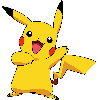

In [12]:
path = "/content/images/Test/Pikachu/2004.jpg"
img = image.load_img(path, target_size=(100, 100))
img

In [13]:
img = image.img_to_array(img)
img

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [14]:
img.shape

(100, 100, 3)

In [15]:
for category in classes:
  folder = f"images/Train/{category}"
  for img_name in os.listdir(folder):
    img_path = f"{folder}/{img_name}"

    img = image.load_img(img_path, target_size=(100, 100))
    img = image.img_to_array(img)

    train_data.append(img)
    train_labels.append(category)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
len(train_data)

304

In [17]:
len(train_labels)

304

**#Data PreProcessing :**

In [18]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)



In [19]:
train_data.shape

(304, 100, 100, 3)

In [20]:
train_data.shape, train_labels.shape

((304, 100, 100, 3), (304,))

In [21]:
train_data = train_data.reshape(len(train_data), 30000
                                )
train_data.shape

(304, 30000)

In [22]:
train_labels

array(['Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulb

we have to convert it into numerical form

In [23]:
category2label = {'Pikachu' : 0, 'Charmander' : 1, 'Bulbasaur' : 2 }
label2category = {0 : 'Pikachu', 1 : 'Charmander', 2 : 'Bulbasaur'}

In [24]:
train_labels = np.array([category2label[i] for i in train_labels])
train_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
train_labels.shape

(304,)

Model will predict the Probablity of being Pikachu, Balbasaur, Charmder. So to get a hot Output we'll use :

In [26]:
from keras.utils import to_categorical

In [27]:
train_labels = to_categorical(train_labels)

In [28]:
train_labels

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [29]:
train_labels.shape

(304, 3)

And we've done this for Multiclass Neural Network, We are doing MultiClass classification. if we've been using binary classification , We can have use it anyway.

**#The Model : **

1. Multi-layer Neural Networks.
2. Activation fn : 'relu'/tanh
3. final layer units
4. Final layer activation fn : softmax

**#Model Architecture :**





In [30]:
from  keras.layers import Dense
from keras import Sequential

In [31]:
fetures = train_data.shape[1]

In [32]:
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(fetures,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │      15,360,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,533,187 (59.25 MB)

 Trainable params: 15,533,187 (59.25 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
if len(train_data) > len(train_labels):
    train_data = train_data[:len(train_labels)]  # Truncate the extra image


In [35]:
model.fit(train_data, train_labels, epochs=50, batch_size=32)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 284ms/step - accuracy: 0.3456 - loss: 1920.1289
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 283ms/step - accuracy: 0.3874 - loss: 2261.6890
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 488ms/step - accuracy: 0.3632 - loss: 1831.6565
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 285ms/step - accuracy: 0.4999 - loss: 593.2506
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 430ms/step - accuracy: 0.5848 - loss: 236.8732
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 282ms/step - accuracy: 0.7899 - loss: 80.3948
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 283ms/step - accuracy: 0.6672 - loss: 137.1054
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 378ms/step - accuracy: 0.7521 - loss: 58.7751
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 285ms/step - accuracy: 0.9414 - loss: 16.3244
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 312ms/step - accuracy: 0.9073 - loss: 11.8982
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 283ms/step - accuracy: 0.9402 - loss: 6.5825
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━

***

In [36]:
from keras.preprocessing import image  # Ensure this is correctly imported

test_data = []
test_labels = []

for category in classes:
    folder = f"images/Test/{category}"
    for img_name in os.listdir(folder):
        img_path = f"{folder}/{img_name}"

        # Load image and convert it to an array
        img = image.load_img(img_path, target_size=(100, 100))  # Resize to (100, 100)
        img = image.img_to_array(img)  # Convert to numpy array

        test_data.append(img)
        test_labels.append(category)


In [37]:
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [38]:
test_data.shape

(123, 100, 100, 3)

In [39]:
test_labels.shape

(123,)

In [40]:
#train_labels = np.array([category2label[label] for label in train_labels])
test_labels = np.array([category2label[label] for label in test_labels])
test_labels = to_categorical(test_labels)
test_labels.shape

(123, 3)

In [41]:
test_data = test_data.reshape(len(test_data), 30000)
test_data.shape

(123, 30000)

In [42]:
model.evaluate(test_data, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9797 - loss: 6.9992


[11.326786994934082, 0.9674796462059021]

In [43]:
pred = model.predict(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [44]:
pred

array([[0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.000

In [45]:
model.predict(test_data).round(3)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.

In [46]:
pred = pred.argmax(axis=1)

In [47]:
pred[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
[label2category[i] for i in pred]

['Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Pikachu',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charman

Pediction for 1 image :

In [51]:
test_img = "/content/images/Test/Charmander/2203.jpg"
test_img

'/content/images/Test/Charmander/2203.jpg'

In [52]:
img_test = image.load_img(test_img, target_size=(100, 100))
img_test = image.img_to_array(img_test)
img_test.shape

(100, 100, 3)

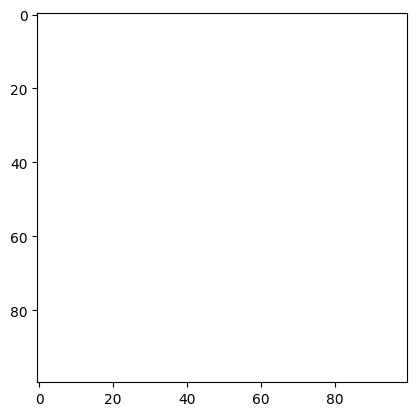

In [53]:
plt.imshow(img_test)

In [54]:
img_test = img_test.reshape(1, 30000)
img_test.shape

(1, 30000)

In [55]:
model.predict(img_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0., 1., 0.]], dtype=float32)

In [56]:
pred = label2category[model.predict(img_test).argmax()]
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'Charmander'

In [57]:
pip install opencv-python tensorflow numpy pillow


In [58]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import cv2
import io
from PIL import Image

In [59]:
# Function to capture an image using JavaScript
def capture_image():
    js = Javascript('''
    async function captureImage() {
        const video = document.createElement('video');
        const stream = await navigator.mediaDevices.getUserMedia({ video: true });
        video.srcObject = stream;
        await video.play();

        // Create a canvas to capture a frame
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        const ctx = canvas.getContext('2d');
        ctx.drawImage(video, 0, 0, canvas.width, canvas.height);

        // Stop video stream
        stream.getTracks().forEach(t => t.stop());

        return canvas.toDataURL('image/jpeg');
    }
    captureImage();
    ''')
    display(js)
    data = eval_js('captureImage()')
    return data

In [60]:
# Decode the image from base64 string
def get_image_from_data_url(data_url):
    header, encoded = data_url.split(",", 1)
    data = b64decode(encoded)
    image = Image.open(io.BytesIO(data))
    return np.array(image)

In [62]:
# Capture image from webcam
data_url = capture_image()

image = get_image_from_data_url(data_url)


<IPython.core.display.Javascript object>

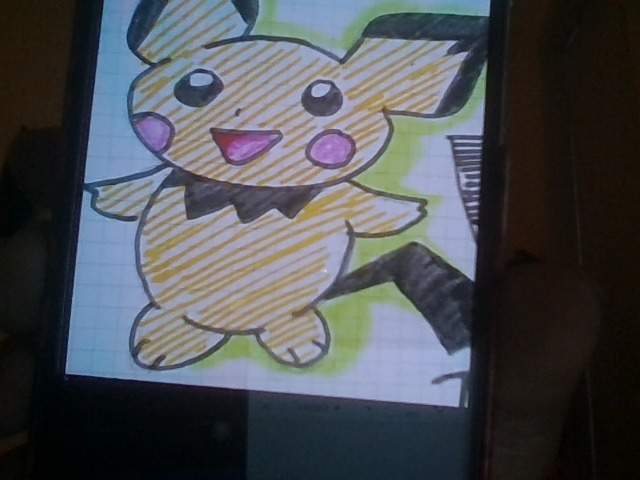

In [63]:
# Display the image
Image.fromarray(image)

In [64]:
# Resize and preprocess the image to fit model input
def preprocess_image(image):
    img_resized = cv2.resize(image, (100, 100))  # Resize to (100, 100)
    img_flattened = img_resized.flatten().reshape(1, 30000)  # Reshape to (1, 30000)
    img_flattened = img_flattened / 255.0  # Normalize the image
    return img_flattened

# Preprocess the webcam image
input_image = preprocess_image(image)


In [65]:
# Make prediction using the model
prediction = model.predict(input_image)

# Get the predicted class label
predicted_class = np.argmax(prediction)
predicted_pokemon = label2category[predicted_class]

# Print the predicted Pokémon
print(f"Predicted Pokémon: {predicted_pokemon}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Pokémon: Bulbasaur
